<a href="https://colab.research.google.com/github/AdityaThorat94/Stock_market_analysis/blob/main/Railway_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating the Railway Index**

---


In [1]:
import pandas as pd #For DataFrames
import yfinance as yf #For the stocks
import matplotlib.pyplot as plt #For the Charts

In [2]:
# List of railway stocks (You can get the Symbols from yfinance.com)
stocks = ['BEML.NS','CONCOR.NS','TITAGARH.NS','RKFORGE.NS','JWL.NS','TEXRAIL.NS','RITES.NS','IRCON.NS','RVNL.NS','IRCTC.NS','IRFC.NS','RAILTEL.NS']

In [3]:
# Download stock data for the timeframe that you want
data = yf.download(stocks, start="2011-03-17", end="2024-06-19")['Adj Close']

[*********************100%%**********************]  12 of 12 completed


In [4]:
# Get market capitalizations for all the companies
market_caps = {
    'BEML.NS':196380500000,
    'CONCOR.NS':694504200000,
    'TITAGARH.NS':199727900000,
    'RKFORGE.NS':134717300000,
    'JWL.NS':284379500000,
    'TEXRAIL.NS':84663100000,
    'RITES.NS':169460900000,
    'IRCON.NS':253139800000,
    'RVNL.NS':813574800000,
    'IRCTC.NS':814560000000,
    'IRFC.NS':2284374800000,
    'RAILTEL.NS':135002700000
}

In [5]:
# Calculate weights weight every stock would have in the Index based on Market Cap
total_market_cap = sum(market_caps.values())
weights = {stock: market_caps[stock] / total_market_cap for stock in stocks}

In [6]:
# Calculate the Railway index
index = (data * pd.Series(weights)).sum(axis=1)

In [7]:
# Normalize the index to start at 1000 (or whichever number you like)
index = (index / index.iloc[0]) * 1000

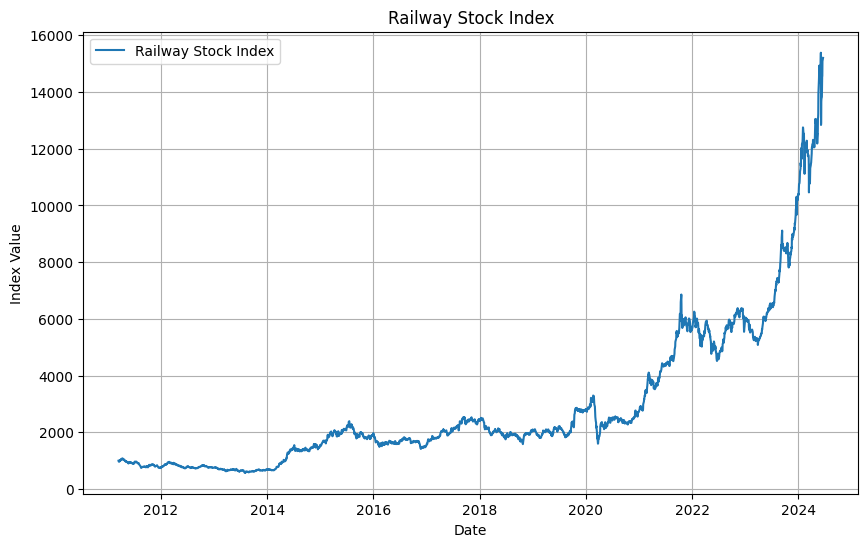

In [8]:
# Plot the Railway index
plt.figure(figsize=(10, 6))
plt.plot(index, label='Railway Stock Index')
plt.title('Railway Stock Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

**Comparing the Railway Index with the Nifty**

---



In [9]:
# Reassigning the Railway Index
railway_index = index

In [10]:
# Downloading and normailzing the Nifty data
nifty_data = yf.download('^NSEI', start="2011-03-17", end="2024-06-19")['Adj Close']
nifty_index = (nifty_data / nifty_data.iloc[0]) * 1000

[*********************100%%**********************]  1 of 1 completed


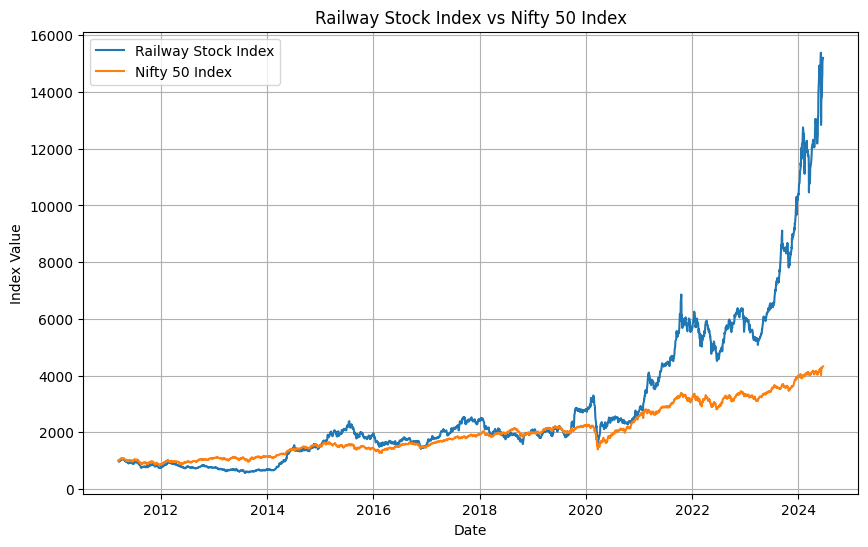

In [11]:
# Plot both indices together
plt.figure(figsize=(10, 6))
plt.plot(railway_index, label='Railway Stock Index')
plt.plot(nifty_index, label='Nifty 50 Index')
plt.title('Railway Stock Index vs Nifty 50 Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Calculate performance metrics
railway_return = (index.iloc[-1] / index.iloc[0]) - 1
nifty_return = (nifty_index.iloc[-1] / nifty_index.iloc[0]) - 1
alpha = railway_return - nifty_return

In [13]:
print(f"Railway Index Total Return: {railway_return:.2%}")
print(f"Nifty 50 Index Total Return: {nifty_return:.2%}")
print(f"Alpha Generated by Railway Index: {alpha:.2%}")

Railway Index Total Return: 1420.30%
Nifty 50 Index Total Return: 332.52%
Alpha Generated by Railway Index: 1087.78%


The Railway Index Returned **1414.80%** since 2011

---


Nifty 50 Index Returned **332.52%** since 2011


---


 generated an Alpha of  **1082.28%** since 2011 over the Nifty

**1. Volatility Analysis**

In [14]:
# Calculate daily returns
railway_returns = railway_index.pct_change().dropna()
nifty_returns = nifty_index.pct_change().dropna()

# Calculate daily volatility
railway_volatility = railway_returns.std()
nifty_volatility = nifty_returns.std()

print(f"Railway Index Volatility: {railway_volatility:.2%}")
print(f"Nifty 50 Index Volatility: {nifty_volatility:.2%}")

Railway Index Volatility: 1.75%
Nifty 50 Index Volatility: 1.06%


**2. Sharpe Ratio**

In [15]:
risk_free_rate = 0.07  # As of 13 June as per tradingeconomics

# Calculate annualized returns and volatility
annualized_railway_return = (1 + railway_return) ** (252 / len(railway_returns)) - 1
annualized_nifty_return = (1 + nifty_return) ** (252 / len(nifty_returns)) - 1
annualized_railway_volatility = railway_returns.std() * (252 ** 0.5)
annualized_nifty_volatility = nifty_returns.std() * (252 ** 0.5)

# Calculate Sharpe Ratios
railway_sharpe_ratio = (annualized_railway_return - risk_free_rate) / annualized_railway_volatility
nifty_sharpe_ratio = (annualized_nifty_return - risk_free_rate) / annualized_nifty_volatility

print(f"Railway Index Sharpe Ratio: {railway_sharpe_ratio:.2f}")
print(f"Nifty 50 Index Sharpe Ratio: {nifty_sharpe_ratio:.2f}")

Railway Index Sharpe Ratio: 0.59
Nifty 50 Index Sharpe Ratio: 0.30


**3. Beta Calculation**

In [16]:
def calculate_max_drawdown(series):
    roll_max = series.cummax()
    daily_drawdown = series / roll_max - 1.0
    max_drawdown = daily_drawdown.cummin()
    return max_drawdown.min()

railway_max_drawdown = calculate_max_drawdown(railway_index)
nifty_max_drawdown = calculate_max_drawdown(nifty_index)

print(f"Railway Index Maximum Drawdown: {railway_max_drawdown:.2%}")
print(f"Nifty 50 Index Maximum Drawdown: {nifty_max_drawdown:.2%}")

Railway Index Maximum Drawdown: -51.46%
Nifty 50 Index Maximum Drawdown: -38.44%


**4. Correlation**

In [20]:
correlation = railway_returns.corr(nifty_returns)
print(f"Correlation between Railway Index and Nifty 50 Index: {correlation:.2f}")

Correlation between Railway Index and Nifty 50 Index: 0.52


**5. Rolling Mean**

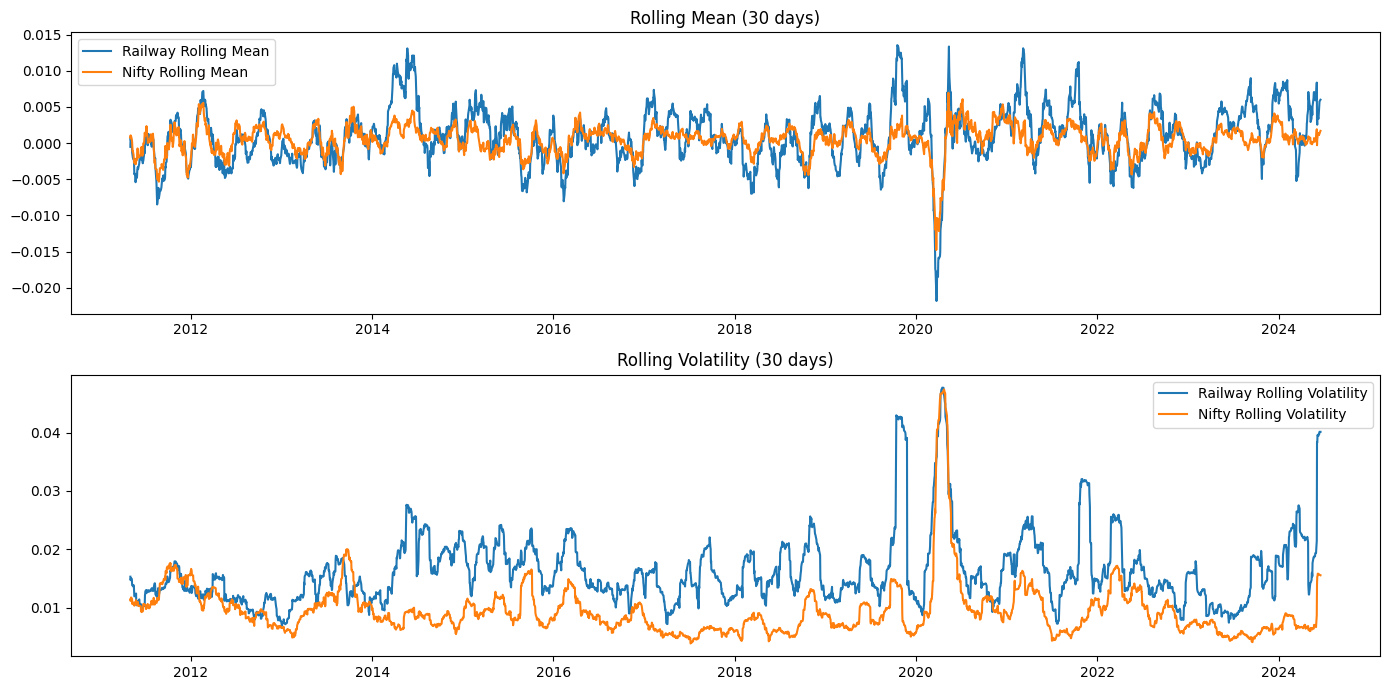

In [19]:
# Rolling mean
railway_rolling_mean = railway_returns.rolling(window=30).mean()
nifty_rolling_mean = nifty_returns.rolling(window=30).mean()

# Rolling volatility
railway_rolling_volatility = railway_returns.rolling(window=30).std()
nifty_rolling_volatility = nifty_returns.rolling(window=30).std()

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(railway_rolling_mean, label='Railway Rolling Mean')
plt.plot(nifty_rolling_mean, label='Nifty Rolling Mean')
plt.title('Rolling Mean (30 days)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(railway_rolling_volatility, label='Railway Rolling Volatility')
plt.plot(nifty_rolling_volatility, label='Nifty Rolling Volatility')
plt.title('Rolling Volatility (30 days)')
plt.legend()

plt.tight_layout()
plt.show()